In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

### Initialization
##### Data: 5x1 element list of concurrent numbers, say [1,5]
##### Target: 1x1 element list of the following numbers to the predicted, say [6] 

In [6]:
Data = [[[(i+j)/100] for i in range(5)] for j in range(100)]
Target = [(i+5)/100 for i in range(100)]

In [7]:
data = np.array(Data, dtype=float)
target = np.array(Target, dtype=float)

In [8]:
data.shape

(100, 5, 1)

In [9]:
target.shape

(100,)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)

In [11]:
model = Sequential()

### return_sequences enables modelling with LSTM-RNN 

In [12]:
model.add(LSTM((1), batch_input_shape=(None,5,1), return_sequences=True))
model.add(LSTM((1), return_sequences=False)) 

### Training & Metrics

In [13]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 1)              12        
                                                                 
 lstm_1 (LSTM)               (None, 1)                 12        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))

Epoch 1/400
3/3 [==============================] - 5s 474ms/step - loss: 0.5351 - accuracy: 0.0000e+00 - val_loss: 0.4311 - val_accuracy: 0.0000e+00
Epoch 2/400
3/3 [==============================] - 0s 27ms/step - loss: 0.5325 - accuracy: 0.0000e+00 - val_loss: 0.4286 - val_accuracy: 0.0000e+00
Epoch 3/400
3/3 [==============================] - 0s 25ms/step - loss: 0.5297 - accuracy: 0.0000e+00 - val_loss: 0.4260 - val_accuracy: 0.0000e+00
Epoch 4/400
3/3 [==============================] - 0s 14ms/step - loss: 0.5270 - accuracy: 0.0000e+00 - val_loss: 0.4233 - val_accuracy: 0.0000e+00
Epoch 5/400
3/3 [==============================] - 0s 14ms/step - loss: 0.5241 - accuracy: 0.0000e+00 - val_loss: 0.4207 - val_accuracy: 0.0000e+00
Epoch 6/400
3/3 [==============================] - 0s 14ms/step - loss: 0.5213 - accuracy: 0.0000e+00 - val_loss: 0.4179 - val_accuracy: 0.0000e+00
Epoch 7/400
3/3 [==============================] - 0s 21ms/step - loss: 0.5184 - accuracy: 0.0000e+00 - val_los

In [16]:
results = model.predict(x_test)

### Results Viz

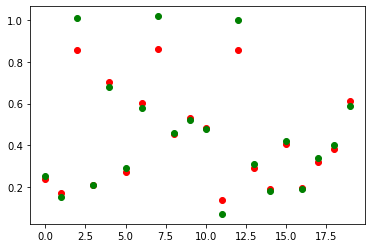

In [17]:
plt.scatter(range(20), results, c='r')
plt.scatter(range(20), y_test,c='g')
plt.show()

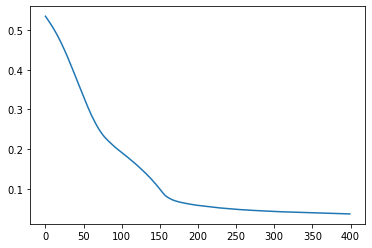

In [18]:
plt.plot(history.history['loss'])
plt.show()

#### The loss nearly stagnates during the later stages - therefore the model would still produce a satisfactory output at epochs~300